In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.python.framework import ops
from read import *
from tf_utils import random_mini_batches
import time

# %matplotlib inline

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_train, Y_train, X_test, Y_test = load_data_set()
Y_train = Y_train.T
Y_test = Y_test.T
print(X_train.shape)
print(X_test.shape)
print(type(Y_train))
print(Y_test.shape)

(3, 700)
(3, 76)
<class 'numpy.ndarray'>
(1, 76)


In [3]:
X_train[0,:].T

# Y_train.shape
# X_train[:,0]

array([  8, 202,  86,  81, 240, 208,  63, 153,  74, 112,   8, 178, 247,
       130, 204, 102,  38,  15,  64, 181, 130, 149,  48,   0, 114,  86,
        17, 120, 163, 233, 152, 220, 227, 141, 181, 134,  96,  48, 120,
        33, 252, 176, 120, 158, 193,  38, 110, 201, 215, 102, 217, 221,
        75, 241, 106,  28, 193, 169, 163,  33,  91,  36, 143, 204, 145,
       240,  36, 199, 203,  89,  78,  87, 163, 236,  86, 129,  11, 189,
       188,  38,  12, 240, 181, 202, 208, 171, 251, 133,  94, 112, 148,
        67,  13, 119, 165, 226, 181, 145, 139, 251, 232,  77, 168, 252,
       180,  98,   0, 241,   0,  33, 255, 100, 141,  91, 130, 241, 219,
       245,  89, 182, 125, 168, 143,   0, 134, 239, 114, 144, 102,   0,
        75,  46, 100, 100, 100, 221, 202,  75, 106,  33, 221, 137,  86,
       247, 196, 150, 218,  45, 162, 152, 203, 238, 129,  51, 239,  15,
        74, 255, 221, 245,   8, 136,  32,  86, 215, 221, 181, 247, 119,
        74, 255, 120, 116, 131,  36,  77, 134,  28,  13, 138, 11

In [4]:
Y_train.shape


(1, 700)

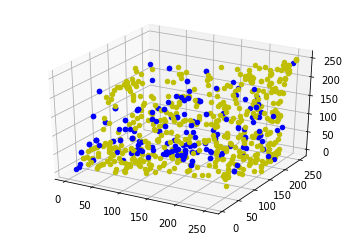

In [22]:
ax =plt.axes(projection='3d')

for i in range(X_train.shape[1]):
    if Y_train[0,i]==1:
        ax.scatter3D(X_train[0,i], X_train[1,i], X_train[2,i],c='b');
    else:
        ax.scatter3D(X_train[0,i], X_train[1,i], X_train[2,i],c='y');



# , c=Y_train[:,0]


In [10]:
learning_rate = 0.01
training_epochs = 2500

In [4]:
# tf Graph Input
X = tf.placeholder(tf.float32, [3, None],name="X") # mnist data image of shape 28*28=784
Y = tf.placeholder(tf.float32, [1, None],name="Y") # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.get_variable("W", [1, 3], initializer = tf.contrib.layers.xavier_initializer())
b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())


# Construct model
Z = tf.add(tf.matmul(W, X), b)
prediction = tf.nn.sigmoid(Z)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))
# Gradient Descent
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
cost_history = np.empty(shape=[1],dtype=float)

In [11]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        _,c = sess.run([optimizer,cost],feed_dict={X:X_train,Y:Y_train})
        #print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
         #      "W=", sess.run(W), "b=", sess.run(b))
        cost_history = np.append(cost_history, c)
        # Calculate the correct predictions
    correct_prediction = tf.to_float(tf.greater(prediction, 0.5))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(Y, correct_prediction)))

    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
    

Train Accuracy: 0.71428573
Test Accuracy: 0.34210527


In [3]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）

    返回：
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"

    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。

    """

    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")

    return X, Y

In [4]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 3]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [1, 12]
        b3 : [1, 1]

    返回：
        parameters - 包含了W和b的字典


    """

    tf.set_random_seed(1) #指定随机种子

    W1 = tf.get_variable("W1",[25,3],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [1, 1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

In [5]:
def forward_propagation(X,parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

    参数：
        X - 输入数据的占位符，维度为（输入节点数量，样本数量）
        parameters - 包含了W和b的参数的字典

    返回：
        Z3 - 最后一个LINEAR节点的输出

    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1,X),b1)        # Z1 = np.dot(W1, X) + b1
    #Z1 = tf.matmul(W1,X) + b1             #也可以这样写
    A1 = tf.nn.relu(Z1)                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3,Z2) + b3


    return Z3

In [6]:
def compute_cost(Z3,Y):
    """
    计算成本

    参数：
        Z3 - 前向传播的结果
        Y - 标签，一个占位符，和Z3的维度相同

    返回：
        cost - 成本值


    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置

    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=labels))

    return cost

In [9]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))
                       
        # visulization
        writer = tf.summary.FileWriter(logdir="./log", graph=sess.graph)

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

epoch = 0    epoch_cost = 5.811235802514212
epoch = 100    epoch_cost = 0.63832311970847
epoch = 200    epoch_cost = 0.5854235589504241
epoch = 300    epoch_cost = 0.575508808805829
epoch = 400    epoch_cost = 0.5687948209898812
epoch = 500    epoch_cost = 0.5570536468710218
epoch = 600    epoch_cost = 0.5531401151702519
epoch = 700    epoch_cost = 0.5457457857472556
epoch = 800    epoch_cost = 0.5480761740888868
epoch = 900    epoch_cost = 0.5374636082422165
epoch = 1000    epoch_cost = 0.5416447506064461
epoch = 1100    epoch_cost = 0.5360039557729448
epoch = 1200    epoch_cost = 0.5307451202755884
epoch = 1300    epoch_cost = 0.5373513343788329
epoch = 1400    epoch_cost = 0.5351281464099884


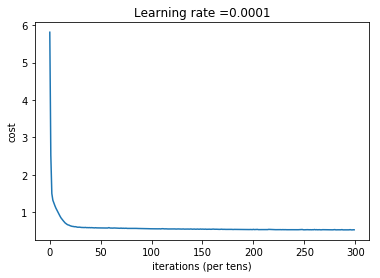

参数已经保存到session。
训练集的准确率： 1.0
测试集的准确率: 1.0
CPU的执行时间 = 103.19529699999998 秒


In [10]:
#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )

In [11]:
### 测试其他颜色是属于中系颜色还是日系
cadeBlue1 = np.array([92,34,35],dtype='float32').reshape((3,1))
predict = forward_propagation(cadeBlue1,parameters)
with tf.Session() as sess:
    print(sess.run(tf.sigmoid(predict)))

[[0.3593516]]
